In [24]:
%load_ext autoreload
%autoreload 2
from importlib import reload
import main as main_
import matplotlib.pyplot as plt
import nn
#reload(main)
nn.load_all()
from main import *
import cartopy
import cartopy.crs as ccrs
import cartopy.util as cutil
import numpy as np
from metpy.plots import SkewT

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Data loaded
Constants loaded


/usr/local/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 17
  result = blockwise(
/usr/local/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 17
  result = blockwise(
/usr/local/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 17
  result = blockwise(


Climatological average loaded


(0.0, 100.0)

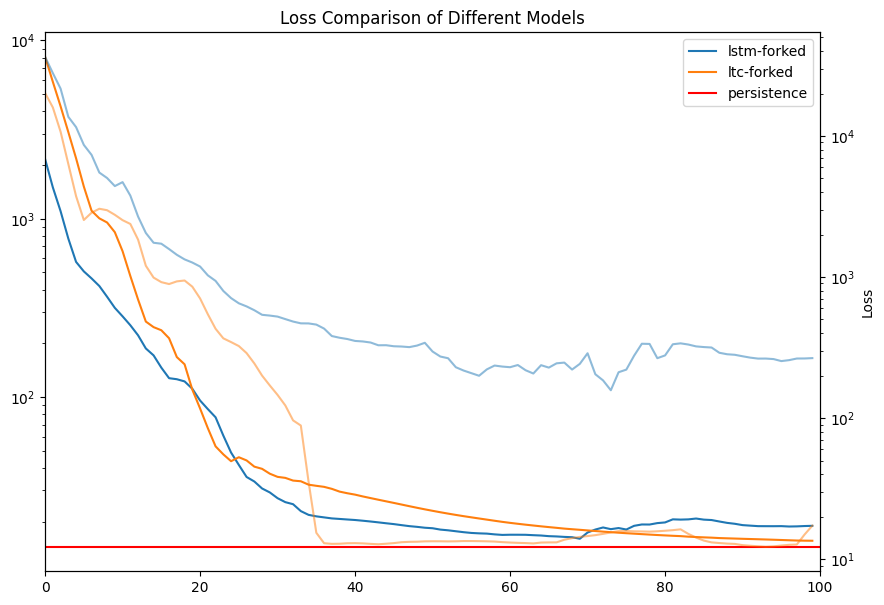

In [16]:
plt.figure(figsize=(10, 7))

#for data in ModelData.load_all():
#    #if data.constructor == 'ltc' and not data.big and data.sparsity == 0.6:
#    if len(data.get_var('val_loss')) > 300:
#    #if True:
#        loss = data.get_var('val_loss')
#        time = data.get_var('time')
#        plt.plot(time, loss, label=data.autoname(detail=True))

# ltc-(forked)-good: huquez_bothoth
# lstm-(forked)-bad: quophong_foyuth
# ltc-(big)-bad: futhug_whader
# lstm-(big)-bad: muces_kowhah
# for name in 'huquez_bothoth quophong_foyuth futhug_whader muces_kowhah'.split():
ax1 = plt.gca()
ax2 = ax1.twinx()
for name in 'zafek_phuvoch scewhiq_xocug'.split():
    data = ModelData.load(name)
    loss = data.get_var('val_loss')
    #time = data.get_var('epoch')
    #time = range(1, len(loss) + 1)
    #plt.plot(time, loss, label=data.autoname())
    ax1.plot(loss, label=data.autoname())
    ax2.plot(data.get_var('variance'), alpha=0.5)

ax1.axhline(y=data.base_data.val_loss, color='r', linestyle='-', label='persistence')
#plt.axhline(y=67, color='b', linestyle='-', label='asymptotic loss')
ax1.legend()
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('Loss Comparison of Different Models')
plt.xlabel('Time (s)')
plt.ylabel('Loss')
#plt.xlim(0, 200)
plt.xlim(0, 100)

In [17]:
plt.figure(figsize=(10, 7))

for data in ModelData.load_all():
    if data.constructor == 'ltc' and not data.big:
    #if True:
        loss = data.get_var('val_loss')
        plt.plot(loss, label=data.autoname(detail=True))

plt.axhline(y=data1.base_data.val_loss, color='r', linestyle='-', label='persistence')
plt.legend()
plt.yscale('log')
plt.title('Loss Comparison of Different Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')

TypeError: EpochData.__new__() missing 2 required positional arguments: 'time' and 'variance'

<Figure size 1000x700 with 0 Axes>

(400500,
 667226,
 400500,
 400500,
 475572,
 667226,
 475572,
 667226,
 475572,
 400500,
 400500,
 400500,
 400500,
 400500,
 400500)

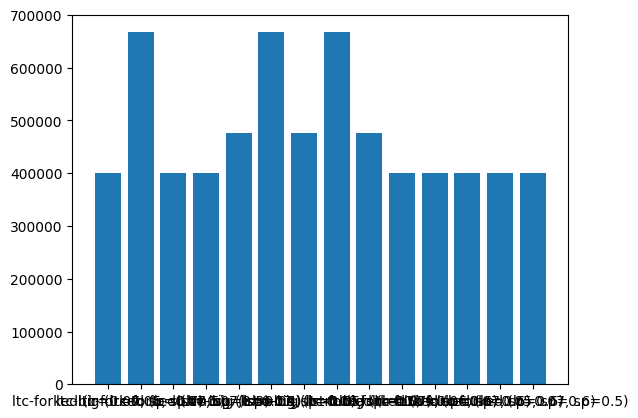

In [116]:
_datas = [(data.autoname(detail=True), sum(x.numel() for x in data.model.parameters() if x.requires_grad)) for data in ModelData.load_all()]
labels, datas = zip(*_datas)
plt.bar(labels, datas)
datas

In [90]:
# itekin_quphoci shater_bichod
# ltc-(forked)-good: huquez_bothoth
# lstm-(forked)-bad: quophong_foyuth
# ltc-(big)-bad: futhug_whader
# lstm-(big)-bad: muces_kowhah
orig = nn.random_slice_fast()
test_data = normalize(orig)
#fresh = nn.WeatherPredictor()

tensor(0.5655)

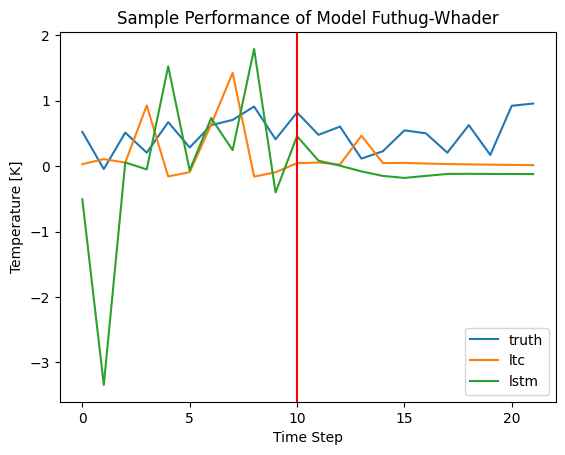

In [115]:
# scewhiq_xocug (ltc) zafek_phuvoch (lstm)
test_model_data1 = ModelData.load('scewhiq_xocug')
test_model_data2 = ModelData.load('zafek_phuvoch')
inp_data = test_data[:nn.TIME_LENGTH]
test_model_data1.model.eval()
test_model_data2.model.eval()
complete_points1 = test_model_data1.model(inp_data).reshape((22, 4, 17))
complete_points2 = test_model_data2.model(inp_data).reshape((22, 4, 17))
points1 = complete_points1[:,0,0].detach()
points2 = complete_points2[:,0,0].detach()
#fresh_points = fresh(inp_data).reshape((22, 4, 17))[:,0,0].detach()
true_points = test_data[:,0,nn.GLOBAL_TILE,nn.GLOBAL_TILE,0]
# print(points.shape)
# print(true_points.shape)
plt.plot(true_points, label='truth')
plt.plot(points1, label='ltc')
plt.plot(points2, label='lstm')
#plt.plot(fresh_points, label='fresh')
plt.legend()
plt.axvline(x=nn.TIME_LENGTH, color='r')
plt.title('Sample Performance of Model Futhug-Whader')
plt.xlabel('Time Step')
plt.ylabel('Temperature [K]')
torch.nn.functional.l1_loss(points[nn.TIME_LENGTH:], true_points[nn.TIME_LENGTH:])

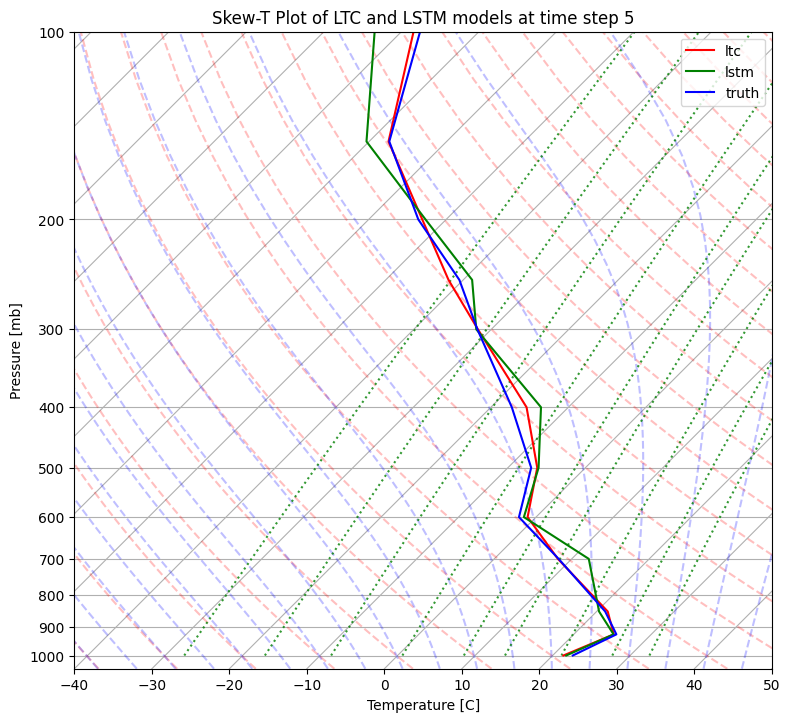

In [128]:
test_denorm1 = complete_points1 * main.denorm_data[0].squeeze().unsqueeze(-1) + main.denorm_data[1].swapaxes(1, 2)
test_denorm2 = complete_points2 * main.denorm_data[0].squeeze().unsqueeze(-1) + main.denorm_data[1].swapaxes(1, 2)

fig = plt.figure(figsize=(9, 11))
skew = SkewT(fig, rotation=45)

p = nn.DATA.vars.level
#T1 = complete_points[0,0,:].detach()
time_s = 5
T1 = test_denorm1[time_s,0,:].detach()
T2 = test_denorm2[time_s,0,:].detach()
T3 = orig[time_s,0,nn.GLOBAL_TILE,nn.GLOBAL_TILE,:].detach()
#T1 = orig[21,0,nn.GLOBAL_TILE,nn.GLOBAL_TILE,:].detach()
skew.plot(p, T1 - 273, 'r', label='ltc')
skew.plot(p, T2 - 273, 'g', label='lstm')
skew.plot(p, T3 - 273, 'b', label='truth')
# UT = orig[21,1,nn.GLOBAL_TILE,nn.GLOBAL_TILE,:].detach()
# VT = orig[21,2,nn.GLOBAL_TILE,nn.GLOBAL_TILE,:].detach()
# skew.plot_barbs(p, UT, VT, y_clip_radius=0.03)

skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                      alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                        alpha=0.25, color='tab:green')
skew.plot_mixing_lines(pressure=np.arange(1000, 99, -20) * units.hPa,
                       linestyle='dotted', color='tab:blue')

skew.ax.set_xlabel("Temperature [C]")
skew.ax.set_ylabel("Pressure [mb]")

plt.title(f'Skew-T Plot of LTC and LSTM models at time step {time_s}')
plt.legend()
plt.show()

In [19]:
anom_sel = nn._anom_sel

In [25]:
nn._anom_sel = torch.zeros_like(nn._anom_sel)
nn._anom_sel = anom_sel
nn._anom_sel.norm()

tensor(19055.3633)

In [5]:
import cartopy
import cartopy.crs as ccrs
import cartopy.util as cutil
from datetime import timedelta

In [68]:
(nn.CLIM_AVG - nn.DATA.vars)

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 1461)
Coordinates:
  * level    (level) float32 10.0 20.0 30.0 50.0 ... 700.0 850.0 925.0 1e+03
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1999-01-01 1999-01-01T06:00:00 ... 2000-01-01
Data variables:
    air      (time, level, lat, lon) float32 dask.array<chunksize=(1, 1, 73, 144), meta=np.ndarray>
    shum     (time, level, lat, lon) float32 dask.array<chunksize=(1, 10, 73, 144), meta=np.ndarray>
    uwnd     (time, level, lat, lon) float32 dask.array<chunksize=(1, 1, 73, 144), meta=np.ndarray>
    vwnd     (time, level, lat, lon) float32 dask.array<chunksize=(1, 1, 73, 144), meta=np.ndarray>

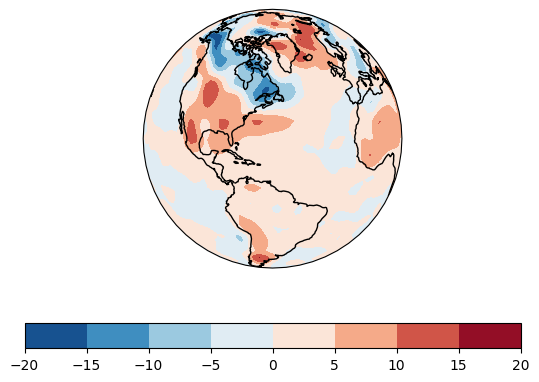

In [10]:
im = (nn.DATA.vars - cust_clim_avg).isel(time=1459, level=16)
data, lon, lat = cutil.add_cyclic(im.air, im.lon, im.lat)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=300, central_latitude=30))
ax.set_global()
lines = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
fig.colorbar(lines, orientation='horizontal')

In [9]:
cust_clim_avg = nn.CLIM_AVG.rolling(time=14, center=True, min_periods=1).mean().rolling(lon=10, center=True, min_periods=1).mean().rolling(lat=10, center=True, min_periods=1).mean()

In [40]:
nn.DATA.vars

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 4384)
Coordinates:
  * level    (level) float32 10.0 20.0 30.0 50.0 ... 700.0 850.0 925.0 1e+03
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1999-01-01 ... 2001-12-31T18:00:00
Data variables:
    air      (time, level, lat, lon) float32 dask.array<chunksize=(1, 1, 73, 144), meta=np.ndarray>
    shum     (time, level, lat, lon) float32 dask.array<chunksize=(1, 10, 73, 144), meta=np.ndarray>
    uwnd     (time, level, lat, lon) float32 dask.array<chunksize=(1, 1, 73, 144), meta=np.ndarray>
    vwnd     (time, level, lat, lon) float32 dask.array<chunksize=(1, 1, 73, 144), meta=np.ndarray>
Attributes:
    Conventions:    COARDS
    title:          4x daily NMC reanalysis (1999)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [38]:
cust_clim_avg.air.head().to_numpy()

array([[[[135.93333, 135.93333, 135.93333, 135.93333, 135.93333],
         [135.50002, 135.50002, 135.5    , 135.5    , 135.46667],
         [135.00002, 135.00002, 134.96667, 135.00002, 135.00002],
         [134.96667, 135.03334, 135.06667, 135.1    , 135.13335],
         [135.36668, 135.46667, 135.56668, 135.63335, 135.73335]],

        [[132.7    , 132.7    , 132.7    , 132.7    , 132.7    ],
         [131.76668, 131.76668, 131.8    , 131.8    , 131.8    ],
         [131.3    , 131.33334, 131.36668, 131.40001, 131.43333],
         [131.1    , 131.13335, 131.16667, 131.23335, 131.26668],
         [130.90001, 130.96667, 131.03334, 131.1    , 131.16667]],

        [[133.06667, 133.06667, 133.06667, 133.06667, 133.06667],
         [132.90001, 132.90001, 132.90001, 132.90001, 132.86667],
         [132.50002, 132.46667, 132.43335, 132.43335, 132.43333],
         [131.90001, 131.90001, 131.90001, 131.93333, 131.93333],
         [131.36668, 131.36668, 131.40001, 131.46667, 131.53334]],

    